<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Features_selection_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset: National Institute of Diabetes and Digestive and Kidney Diseases
# Based on: https://machinelearningmastery.com/feature-selection-machine-learning-python/


from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
filename = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/pima-indians-diabetes.csv'
names = ['n_pregnant', 'plasma', 'pressure', 'skin', 'test', 'body_mass', 'pedigree', 'age', 'class']
dataframe = read_csv(filename, names=names)
dataframe.head()

,n_pregnant,plasma,pressure,skin,test,body_mass,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

fit_scores [ 39.67 213.16   3.26   4.3   13.28  71.77  23.87  46.14]
       result     feature
2    3.256950    pressure
3    4.304381        skin
4   13.281108        test
6   23.871300    pedigree
0   39.670227  n_pregnant
7   46.140611         age
5   71.772072   body_mass
1  213.161752      plasma


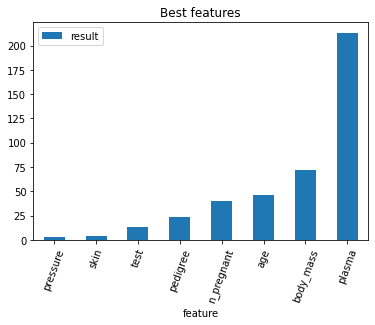

In [8]:

import pandas as pd

import matplotlib.pyplot as plot

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature selection
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

# summarize scores
set_printoptions(precision=2)
print("fit_scores", fit.scores_)
# type(fit.scores_)

fit_dataframe = pd.DataFrame(fit.scores_)

fit_dataframe['feature'] = pd.Series(dataframe.columns.values.tolist())
fit_dataframe.rename(columns={fit_dataframe.columns[0]: 'result'},inplace=True)

fit_dataframe= fit_dataframe.sort_values('result')

print(fit_dataframe)

fit_dataframe.plot.bar(x="feature", y="result", rot=70, title="Best features");

plot.show(block=True);


In [30]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction

model = LogisticRegression(solver='lbfgs',max_iter=200)
rfe = RFE(model, n_features_to_select=3)

fit = rfe.fit(X, Y)
#print("Num Features: %d" % fit.n_features_)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)

type(fit.support_)


fit_dataframe = pd.DataFrame(fit.support_)

fit_dataframe['feature'] = pd.Series(dataframe.columns.values.tolist())
fit_dataframe.rename(columns={fit_dataframe.columns[0]: 'result'},inplace=True)

fit_dataframe= fit_dataframe.sort_values('result')

fit_dataframe.loc[fit_dataframe['result'] == True, 'feature']


0    n_pregnant
5     body_mass
6      pedigree
Name: feature, dtype: object

In [31]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.89 0.06 0.03]
[[-2.02e-03  9.78e-02  1.61e-02  6.08e-02  9.93e-01  1.40e-02  5.37e-04
  -3.56e-03]
 [-2.26e-02 -9.72e-01 -1.42e-01  5.79e-02  9.46e-02 -4.70e-02 -8.17e-04
  -1.40e-01]
 [-2.25e-02  1.43e-01 -9.22e-01 -3.07e-01  2.10e-02 -1.32e-01 -6.40e-04
  -1.25e-01]]


[0.11 0.25 0.11 0.07 0.07 0.13 0.12 0.14]
     result     feature
3  0.073540        skin
4  0.074230        test
0  0.106257  n_pregnant
2  0.113853    pressure
6  0.117641    pedigree
5  0.127586   body_mass
7  0.135734         age
1  0.251159      plasma


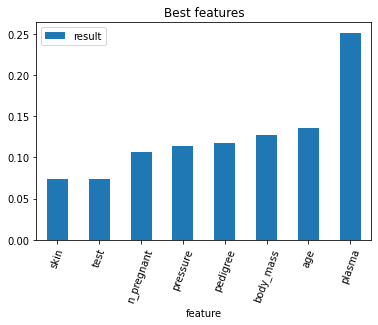

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)


fit_dataframe = pd.DataFrame(model.feature_importances_)

fit_dataframe['feature'] = pd.Series(dataframe.columns.values.tolist())
fit_dataframe.rename(columns={fit_dataframe.columns[0]: 'result'},inplace=True)

fit_dataframe= fit_dataframe.sort_values('result')

print(fit_dataframe)

fit_dataframe.plot.bar(x="feature", y="result", rot=70, title="Best features");

plot.show(block=True);
